# K-Nearest Neighbors Training 

This notebook trains a KNN classifier

**Key Features:**
- Feature scaling (critical for KNN performance)
- SMOTE 
- Optimal k-value selection
- Hyperparameter tuning
- Comprehensive evaluation

**Note:** KNN can be slow on large datasets. Consider using a smaller sample or be patient!

## 1. Setup and Imports

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time


# Add project root to path
root_dir = os.getcwd().split("AdversarialNIDS")[0] + "AdversarialNIDS"
sys.path.append(root_dir)

from CICIDS2017.dataset import CICIDS2017
from UNSWNB15.dataset import UNSWNB15

from scripts.models.model_utils import (
    check_data_leakage
)

# Import model-specific modules
from scripts.models.knn.knn import train_knn
from scripts.models.knn.optimal_k import find_optimal_k

from scripts.logger import LoggerManager
from scripts.analysis.model_analysis import perform_model_analysis

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Imports successful")

Imports successful


## 2. Initialize Logger

In [2]:
logger = LoggerManager(
    root_dir=root_dir,
    log_name="knn_notebook"
).get_logger()
logger.info("Starting KNN training notebook")

2025-11-26 09:12:23,031 - INFO - Starting KNN training notebook


## 3. Load and Preprocess Data

In [4]:
# Load dataset
logger.info("Loading CICIDS2017 dataset...")
dataset = CICIDS2017(logger=logger).optimize_memory().encode().subset(size=100000, multi_class=True)

2025-11-26 09:12:33,175 - INFO - Loading CICIDS2017 dataset...
2025-11-26 09:12:33,176 - INFO - Downloading dataset: sweety18/cicids2017-full-dataset
2025-11-26 09:12:33,687 - INFO - Loading dataset into DataFrame
2025-11-26 09:12:47,492 - INFO - Initial dimensions: 2,214,469 rows x 79 columns = 174,943,051 cells
2025-11-26 09:13:02,790 - INFO - ============================================================
2025-11-26 09:13:02,791 - INFO - Preprocessing completed successfully
2025-11-26 09:13:02,792 - INFO - Final dimensions: 1,940,693 rows x 71 columns
2025-11-26 09:13:02,792 - INFO - Total rows removed: 273,776 (12.36%)
2025-11-26 09:13:02,793 - INFO - data retention rate: 87.64%
2025-11-26 09:13:02,793 - INFO - ============================================================
2025-11-26 09:13:02,794 - INFO - Optimizing memory usage of the dataset...
2025-11-26 09:13:02,797 - INFO - Initial memory usage: 1066.05 MB
2025-11-26 09:13:03,495 - INFO - Optimized memory usage: 555.24 MB
2025-11-2

## 4. Data Leakage Check

In [ ]:
#diagnostics = check_data_leakage(X, y, logger=logger)

## 5. Train/Test Split

In [5]:
# Split data
X_train, X_test, y_train, y_test = dataset.split(test_size=0.2, apply_smote=True)
print(f"Train set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

2025-11-26 09:13:04,503 - INFO - Splitting dataset into training and testing sets...
2025-11-26 09:13:05,048 - INFO - Class distribution before SMOTE:
2025-11-26 09:13:05,049 - INFO -   Class 0.0: 20019 samples
2025-11-26 09:13:05,049 - INFO -   Class 1.0: 19971 samples
2025-11-26 09:13:05,050 - INFO -   Class 2.0: 20069 samples
2025-11-26 09:13:05,050 - INFO -   Class 3.0: 19941 samples
2025-11-26 09:13:05,051 - INFO - Class distribution after SMOTE:
2025-11-26 09:13:05,052 - INFO -   Class 0.0: 20019 samples
2025-11-26 09:13:05,053 - INFO -   Class 1.0: 19971 samples
2025-11-26 09:13:05,053 - INFO -   Class 2.0: 20069 samples
2025-11-26 09:13:05,054 - INFO -   Class 3.0: 19941 samples


Train set shape: (80000, 70)
Test set shape: (20000, 70)


## 6. Find Optimal k Value

Let's test different k values to find the optimal one.

2025-11-26 09:13:05,061 - INFO - Finding optimal k value...
2025-11-26 09:13:05,062 - INFO - Testing k values: [3, 5, 7, 9, 11, 13, 15, 17, 19]
2025-11-26 09:13:15,205 - INFO - k=3: 0.9845 (+/- 0.0012)
2025-11-26 09:13:25,434 - INFO - k=5: 0.9840 (+/- 0.0011)
2025-11-26 09:13:35,692 - INFO - k=7: 0.9834 (+/- 0.0013)
2025-11-26 09:13:45,967 - INFO - k=9: 0.9829 (+/- 0.0012)
2025-11-26 09:13:53,556 - INFO - k=11: 0.9820 (+/- 0.0011)
2025-11-26 09:14:00,776 - INFO - k=13: 0.9810 (+/- 0.0011)
2025-11-26 09:14:08,304 - INFO - k=15: 0.9802 (+/- 0.0010)
2025-11-26 09:14:15,630 - INFO - k=17: 0.9794 (+/- 0.0012)
2025-11-26 09:14:22,986 - INFO - k=19: 0.9787 (+/- 0.0012)
2025-11-26 09:14:22,988 - INFO - 
✓ Optimal k: 3 with CV score: 0.9845


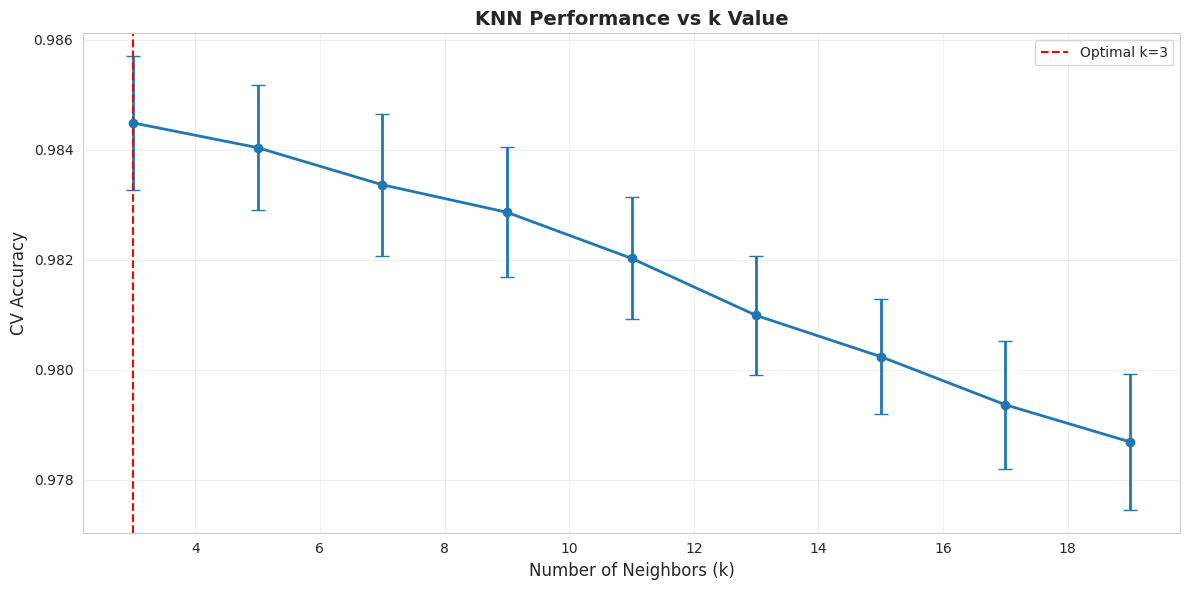


✓ Optimal k: 3
  CV Score: 0.9845


In [6]:
# Find optimal k
logger.info("Finding optimal k value...")
k_results = find_optimal_k(
    X_train, 
    y_train, 
    k_range=range(3, 21, 2),  # Test k=3,5,7,9,11,13,15,17,19
    cv=5,
    logger=logger
)

# Plot results
plt.figure(figsize=(12, 6))
plt.errorbar(k_results['k_values'], k_results['mean_scores'], 
             yerr=k_results['std_scores'], marker='o', capsize=5, linewidth=2)
plt.axvline(x=k_results['optimal_k'], color='r', linestyle='--', 
            label=f"Optimal k={k_results['optimal_k']}")
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('CV Accuracy', fontsize=12)
plt.title('KNN Performance vs k Value', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✓ Optimal k: {k_results['optimal_k']}")
print(f"  CV Score: {k_results['optimal_score']:.4f}")

## 7. Cross-Validation and training

 **This may take several minutes depending on your sample size.**

In [7]:
# Unpack model and CV scores from train_knn
knn_model, cv_scores = train_knn(
    X_train,
    y_train,
    n_neighbors=k_results['optimal_k'],
    weights='uniform',
    metric='minkowski',
    p=2,
    cv_test=False,
    cv=5,
    logger=logger
)

if cv_scores!= None:
    print("\n" + "="*50)
    print("CROSS-VALIDATION RESULTS")
    print("="*50)
    print(f"CV Scores: {cv_scores}")
    print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    # Plot CV scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cv_scores)+1), cv_scores, marker='o', markersize=10, linewidth=2, color='green')
    plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', 
                label=f'Mean: {cv_scores.mean():.4f}')
    plt.xlabel('Fold', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Decision Tree Cross-Validation Scores', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

2025-11-26 09:14:23,202 - INFO - Training KNN on full training set...
2025-11-26 09:14:23,209 - INFO - ==================================================
2025-11-26 09:14:23,210 - INFO - K-NEAREST NEIGHBORS MODEL
2025-11-26 09:14:23,211 - INFO - ==================================================
2025-11-26 09:14:23,211 - INFO - Parameters: n_neighbors=3, weights=uniform, metric=minkowski, p=2


## 8. Evaluate on Test Set

2025-11-26 09:14:23,219 - INFO - Running analysis for scikit-learn model: K-Nearest Neighbors


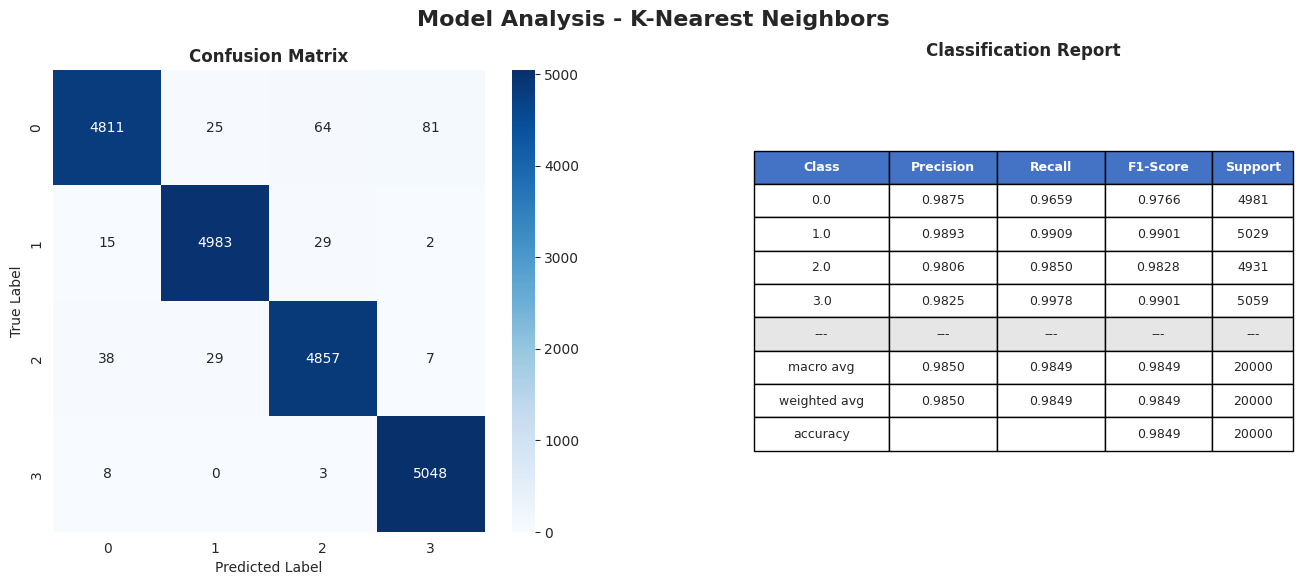

In [8]:
# Evaluate model
cm, cr = perform_model_analysis(
    model=knn_model,
    X_test=X_test,
    y_test=y_test,
    logger=logger,
    title="K-Nearest Neighbors",
    root_dir=root_dir,
    plot=True
)

## 9. (Optional) Hyperparameter Tuning

**Warning:** This is computationally expensive! Only run if you have time.

In [ ]:
# Uncomment to run hyperparameter tuning
# This will take a LONG time!

# logger.info("Starting hyperparameter tuning (this may take a while)...")
# best_params, best_score, grid_search = tune_knn_hyperparameters(
#     X_train_scaled, y_train, cv=3, logger=logger
# )

# print("\nBest parameters found:")
# for param, value in best_params.items():
#     print(f"  {param}: {value}")
# print(f"\nBest CV score: {best_score:.4f}")

## Tips for Improving KNN Performance

1. **Increase sample size** - More data generally helps KNN
2. **Feature selection** - Remove irrelevant features to reduce noise
3. **Dimensionality reduction** - Use PCA or other techniques
4. **Try different k values** - The optimal k depends on your data
5. **Experiment with distance metrics** - Euclidean, Manhattan, Chebyshev
6. **Use weights='distance'** - Gives more weight to closer neighbors
7. **Consider approximate KNN** - For very large datasets (e.g., FAISS, Annoy)